In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import gensim
import numpy as np
from gensim.models import Word2Vec
from time import time  # To time our operations
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

data = pd.read_json("preprocessingDoneRight.json")

E:\Anaconda\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


35137


<function matplotlib.pyplot.show(*args, **kw)>

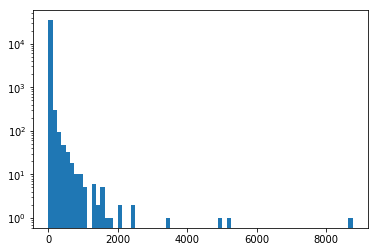

In [2]:
stemmed_words = pd.Series(' '.join(data['modded1']).split()).value_counts()
print(len(stemmed_words))
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

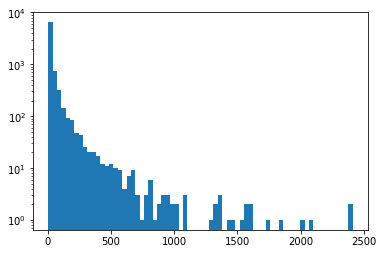

In [3]:
stemmed_words = stemmed_words[stemmed_words > 3]
stemmed_words = stemmed_words[stemmed_words < 3000]
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

In [4]:
data['m'] = data['modded1'].apply(lambda x: " ".join(x for x in x.split() if x in stemmed_words))
pd.Series(' '.join(data['m']).split()).value_counts()
data

,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1,modded1_stemmed,m
0,202,NaN,False,253,Be sure to tune in and watch Donald Trump on L...,5,2009,18,19,2009-05-04,be sure to tune in and watch donald trump on l...,sure tune watch donald trump late night david ...,sure tune watch donald trump late night...,sure tune watch donald late night david letter...
1,3,NaN,False,2,Donald Trump will be appearing on The View tom...,5,2009,1,19,2009-05-05,donald trump will be appearing on the view tom...,donald trump appearing view tomorrow morning d...,donald trump appear view tomorrow morn ...,donald appearing view tomorrow morning discuss...
10,13,NaN,False,5,"""Don’t be afraid of being unique - it's like b...",5,2009,15,20,2009-05-17,"""don’t be afraid of being unique - it's like b...",afraid unique like afraid best self donald j t...,afraid uniqu like afraid best self dona...,afraid unique like afraid best self donald j
100,3,NaN,False,15,The latest update on Bret Michaels is that he'...,5,2010,16,20,2010-05-20,the latest update on bret michaels is that he'...,latest update bret michaels hes making every e...,latest updat bret michael he make everi...,latest update bret michaels hes making every e...
1000,11,NaN,False,71,China is driving the price of gold up in order...,1,2012,19,1,2012-01-05,china is driving the price of gold up in order...,china driving price gold order ease pressure i...,china drive price gold order eas pressu...,china driving price gold order pressure irania...
10000,95,NaN,False,42,"""@KevinMartinRI: I'm a big fan of the new @rea...",8,2013,3,31,2013-08-02,"""@kevinmartinri: i'm a big fan of the new @rea...",kevinmartinri im big fan new realdonaldtrump t...,kevinmartinri im big fan new realdonaldt...,im big fan new ties thanks selling
10001,7,NaN,False,14,"""@bobbassman: @realDonaldTrump @anthonyolgin l...",8,2013,3,31,2013-08-02,"""@bobbassman: @realdonaldtrump @anthonyolgin l...",bobbassman realdonaldtrump like bush killed ki...,bobbassman realdonaldtrump like bush kill...,like bush killed kids iraq invaded wrong count...
10002,29,NaN,False,40,"""@robocosby: help me @realDonaldTrump I am dep...",8,2013,3,31,2013-08-02,"""@robocosby: help me @realdonaldtrump i am dep...",robocosby help realdonaldtrump depressed keep ...,robocosbi help realdonaldtrump depress ke...,help keep
10003,158,NaN,False,219,Isn't it sad the way Putin is toying with Obam...,8,2013,3,31,2013-08-02,isn't it sad the way putin is toying with obam...,isnt sad way putin toying obama regarding snow...,isnt sad way putin toy obama regard sn...,isnt sad way putin toying obama regarding snow...
10004,21,NaN,False,24,"""@hattakzots: @realDonaldTrump you're one of t...",8,2013,3,31,2013-08-02,"""@hattakzots: @realdonaldtrump you're one of t...",hattakzots realdonaldtrump youre one voices re...,hattakzot realdonaldtrump your one voic ...,youre one voices reason crumbling nation ameri...


In [5]:
sentences = data[data["year"] == 2016]["m"].tolist()
#sentences = data[data["year"] == 2016]["modded1"].tolist()
#sentences = data["modded1_stemmed"].tolist()
sentences

['foxnews live members family pm ring new year together make america',
 'happy new year thank',
 'happy new year thank family support',
 'hillary said war lies benghazi allowed wh vote potus',
 'cnn theyre spending millions youre still going win go donald',
 'well year officially begun many stops planned working hard win turn country around',
 'love u family god bless',
 'jodil792 standing spreading president 2016 wake sleep praying',
 'im one biggest fans mr cant wait make america never forget support',
 'huckabee good needs get behind agree',
 'going mississippi tomorrow night hear crowds going massive look forward',
 'never interested politics want get political science trump2016',
 'person hillary clinton least wants run far largest voter turnout ever',
 'thank much naming 2015 man year indeed honor',
 'votetrump2016 together makeamericagreatagain thank support',
 'massive crowds expected mississippi tomorrow night look forward 2015 photos',
 'jebbush sad case total embarrassment f

In [6]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sentences)]
tagged_data

[TaggedDocument(words=['foxnews', 'live', 'members', 'family', 'pm', 'ring', 'new', 'year', 'together', 'make', 'america'], tags=['0']),
 TaggedDocument(words=['happy', 'new', 'year', 'thank'], tags=['1']),
 TaggedDocument(words=['happy', 'new', 'year', 'thank', 'family', 'support'], tags=['2']),
 TaggedDocument(words=['hillary', 'said', 'war', 'lies', 'benghazi', 'allowed', 'wh', 'vote', 'potus'], tags=['3']),
 TaggedDocument(words=['cnn', 'theyre', 'spending', 'millions', 'youre', 'still', 'going', 'win', 'go', 'donald'], tags=['4']),
 TaggedDocument(words=['well', 'year', 'officially', 'begun', 'many', 'stops', 'planned', 'working', 'hard', 'win', 'turn', 'country', 'around'], tags=['5']),
 TaggedDocument(words=['love', 'u', 'family', 'god', 'bless'], tags=['6']),
 TaggedDocument(words=['jodil792', 'standing', 'spreading', 'president', '2016', 'wake', 'sleep', 'praying'], tags=['7']),
 TaggedDocument(words=['im', 'one', 'biggest', 'fans', 'mr', 'cant', 'wait', 'make', 'america', 'ne

In [7]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)


E:\Anaconda\lib\site-packages\gensim\models\doc2vec.py:535: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [8]:
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha



iteration 0


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [ ]:
test_data = word_tokenize("mexico wall year great country")

v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.docvecs.most_similar("1")
print(similar_doc)


# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.docvecs['1'])



In [ ]:
test_data = word_tokenize("mexico")
model.wv.most_similar(test_data)

In [9]:
from sklearn.metrics import silhouette_score

start_alpha=0.01
infer_epoch=1000

X=[]
for d in sentences:
    X.append( model.infer_vector(d, alpha=start_alpha, steps=infer_epoch) )

# BIRCH

In [ ]:
scores = []
for k in range(2,10):
    print(k)
    from sklearn.cluster import Birch

    brc = Birch(branching_factor=50, n_clusters=k, threshold=0.1, compute_labels=True)
    brc.fit(X)

    clusters = brc.predict(X)

    labels = brc.labels_

    #print ("Clusters: ")
    #print (clusters)
    m = silhouette_score(X, labels, metric="euclidean")
    scores.append(m)
    print ("Silhouette_score: ")
    print (k, m)

#silhouette
#0.140 noStop_modded   5 cluster
#0.169 stemmed (no counted)
#0.118 temmed_counted

#silhouette with new preprocessing
#0.135 k = 2/4/5 stemmed
#0.284 k = 2, 1.55 k = 3 not stemmed 

#silhouette su dataset intero non ha senso 


from sklearn.cluster import Birch

brc = Birch(branching_factor=50, n_clusters=k, threshold=0.1, compute_labels=True)
brc.fit(X)

clusters = brc.predict(X)

labels = brc.labels_

#print ("Clusters: ")
#print (clusters)
m = silhouette_score(X, labels, metric="euclidean")
scores.append(m)
print ("Silhouette_score: ")
print (k, m)

# KMEANS

In [ ]:
#try some clustering 
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


In [ ]:
true_k = 5
kmeans = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
kmeans.fit(X)
print(kmeans.inertia_)

d = silhouette_score(X, kmeans.labels_,metric='cosine')
print(d)

# nltk kmeans

In [34]:
from nltk.cluster import KMeansClusterer
import nltk

NUM_CLUSTERS=8
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=40)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print (assigned_clusters)
d = silhouette_score(X, assigned_clusters,metric='cosine')
print(d)
#0.229 con cluster che sembrano decent, problema è che guardi solo parole più frequenti 4
#0.230 " " " " 5 
#0.242 " " " " 6
#0.227 cluster parole frequenti sembrano meglio 7 
#0.226 cluster " " " " " anche se alcuni cluster sono "doppi?"8
#0.229 """""""""""""" 9
#0.237/0.26 """""""""" 10

#nostem
#0.207 6
#0.18 7
#0.182 8 

0.18271637


In [35]:
datak = data[data["year"] == 2016]
datak["labels"] = assigned_clusters
datak

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1,modded1_stemmed,m,labels
25967,6735,NaN,False,2108,"I will be on @FoxNews live, with members of m...",1,2016,0,53,2016-01-01,"i will be on @foxnews live, with members of my...",foxnews live members family 1150 pm ring new y...,foxnew live member famili 1150 pm ring ...,foxnews live members family pm ring new year t...,7
25968,8581,NaN,False,3460,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/Y...,1,2016,3,53,2016-01-01,happy new year &amp; thank you! https://t.co/y...,happy new year amp thank,happi new year amp thank,happy new year thank,7
25970,8258,NaN,False,1948,Happy New Year from #MarALago! Thank you to my...,1,2016,6,53,2016-01-01,happy new year from #maralago! thank you to my...,happy new year thank great family support,happi new year thank great famili support,happy new year thank family support,4
25971,7490,NaN,False,2721,"""@jallenaip: Hillary said she was in a ""Fog of...",1,2016,6,53,2016-01-01,"""@jallenaip: hillary said she was in a ""fog of...",jallenaip hillary said fog war explanation lie...,jallenaip hillari said fog war explan l...,hillary said war lies benghazi allowed wh vote...,7
25972,3330,NaN,False,933,"""@sprinklermanus: @CNN @realDonaldTrump they'r...",1,2016,21,53,2016-01-01,"""@sprinklermanus: @cnn @realdonaldtrump they'r...",sprinklermanus cnn realdonaldtrump theyre spen...,sprinklermanu cnn realdonaldtrump theyr s...,cnn theyre spending millions youre still going...,6
25973,8495,NaN,False,2642,"Well, the year has officially begun. I have ma...",1,2016,23,53,2016-01-01,"well, the year has officially begun. i have ma...",well year officially begun many stops planned ...,well year offici begun mani stop plan ...,well year officially begun many stops planned ...,7
25974,2780,NaN,False,654,"""@marie7777777777: @realDonaldTrump we love u ...",1,2016,23,53,2016-01-01,"""@marie7777777777: @realdonaldtrump we love u ...",marie7777777777 realdonaldtrump love u trump f...,marie7777777777 realdonaldtrump love u tr...,love u family god bless,0
25975,3066,NaN,False,893,"""@JodiL792: We are Standing with you! Spreadin...",1,2016,23,53,2016-01-01,"""@jodil792: we are standing with you! spreadin...",jodil792 standing spreading wordtrump presiden...,jodil792 stand spread wordtrump presid 2...,jodil792 standing spreading president 2016 wak...,4
25976,3492,NaN,False,881,"""@MEMEoryHead: I'm one of your biggest fans Mr...",1,2016,23,53,2016-01-01,"""@memeoryhead: i'm one of your biggest fans mr...",memeoryhead im one biggest fans mr trump cant ...,memeoryhead im one biggest fan mr trump...,im one biggest fans mr cant wait make america ...,6
25977,3346,NaN,False,922,"""@CASuperrunner: @georgehenryw Huckabee is a g...",1,2016,23,53,2016-01-01,"""@casuperrunner: @georgehenryw huckabee is a g...",casuperrunner huckabee good manbut needs get b...,casuperrunn huckabe good manbut need get...,huckabee good needs get behind agree,3


In [36]:
clusters_wordCount = []
for cluster in range(0,NUM_CLUSTERS):
    c = datak[datak["labels"] == cluster]
    words = pd.Series(' '.join(c['m']).split()).value_counts()
    m = words.mean()
    words = words[words > m]
    clusters_wordCount.append(words)
    print("Cluster " + str(cluster) + " dimension " + str(len(c)))

Cluster 0 dimension 266
Cluster 1 dimension 475
Cluster 2 dimension 390
Cluster 3 dimension 603
Cluster 4 dimension 484
Cluster 5 dimension 645
Cluster 6 dimension 647
Cluster 7 dimension 699


In [37]:
for c in range(0,NUM_CLUSTERS):
    print("cluster ", c , clusters_wordCount[c][0:10])

cluster  0 trump2016                70
america                  65
make                     54
makeamericagreatagain    32
cruz                     22
back                     21
rt                       20
vote                     20
get                      15
video                    14
dtype: int64
cluster  1 big        64
hillary    56
back       47
thank      47
rubio      37
bad        34
cruz       33
clinton    30
new        29
crooked    29
dtype: int64
cluster  2 clinton                  35
hillary                  35
get                      35
enjoy                    27
makeamericagreatagain    25
join                     23
cruz                     22
today                    22
interviewed              21
foxandfriends            21
dtype: int64
cluster  3 thank                    179
hillary                  114
makeamericagreatagain     56
clinton                   55
crooked                   50
tonight                   39
america                   37
make          

In [38]:
datak

,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1,modded1_stemmed,m,labels
25967,6735,NaN,False,2108,"I will be on @FoxNews live, with members of m...",1,2016,0,53,2016-01-01,"i will be on @foxnews live, with members of my...",foxnews live members family 1150 pm ring new y...,foxnew live member famili 1150 pm ring ...,foxnews live members family pm ring new year t...,7
25968,8581,NaN,False,3460,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/Y...,1,2016,3,53,2016-01-01,happy new year &amp; thank you! https://t.co/y...,happy new year amp thank,happi new year amp thank,happy new year thank,7
25970,8258,NaN,False,1948,Happy New Year from #MarALago! Thank you to my...,1,2016,6,53,2016-01-01,happy new year from #maralago! thank you to my...,happy new year thank great family support,happi new year thank great famili support,happy new year thank family support,4
25971,7490,NaN,False,2721,"""@jallenaip: Hillary said she was in a ""Fog of...",1,2016,6,53,2016-01-01,"""@jallenaip: hillary said she was in a ""fog of...",jallenaip hillary said fog war explanation lie...,jallenaip hillari said fog war explan l...,hillary said war lies benghazi allowed wh vote...,7
25972,3330,NaN,False,933,"""@sprinklermanus: @CNN @realDonaldTrump they'r...",1,2016,21,53,2016-01-01,"""@sprinklermanus: @cnn @realdonaldtrump they'r...",sprinklermanus cnn realdonaldtrump theyre spen...,sprinklermanu cnn realdonaldtrump theyr s...,cnn theyre spending millions youre still going...,6
25973,8495,NaN,False,2642,"Well, the year has officially begun. I have ma...",1,2016,23,53,2016-01-01,"well, the year has officially begun. i have ma...",well year officially begun many stops planned ...,well year offici begun mani stop plan ...,well year officially begun many stops planned ...,7
25974,2780,NaN,False,654,"""@marie7777777777: @realDonaldTrump we love u ...",1,2016,23,53,2016-01-01,"""@marie7777777777: @realdonaldtrump we love u ...",marie7777777777 realdonaldtrump love u trump f...,marie7777777777 realdonaldtrump love u tr...,love u family god bless,0
25975,3066,NaN,False,893,"""@JodiL792: We are Standing with you! Spreadin...",1,2016,23,53,2016-01-01,"""@jodil792: we are standing with you! spreadin...",jodil792 standing spreading wordtrump presiden...,jodil792 stand spread wordtrump presid 2...,jodil792 standing spreading president 2016 wak...,4
25976,3492,NaN,False,881,"""@MEMEoryHead: I'm one of your biggest fans Mr...",1,2016,23,53,2016-01-01,"""@memeoryhead: i'm one of your biggest fans mr...",memeoryhead im one biggest fans mr trump cant ...,memeoryhead im one biggest fan mr trump...,im one biggest fans mr cant wait make america ...,6
25977,3346,NaN,False,922,"""@CASuperrunner: @georgehenryw Huckabee is a g...",1,2016,23,53,2016-01-01,"""@casuperrunner: @georgehenryw huckabee is a g...",casuperrunner huckabee good manbut needs get b...,casuperrunn huckabe good manbut need get...,huckabee good needs get behind agree,3


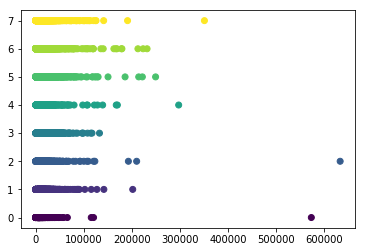

In [39]:
plt.scatter(datak["favorite_count"],datak["labels"],c=datak["labels"])

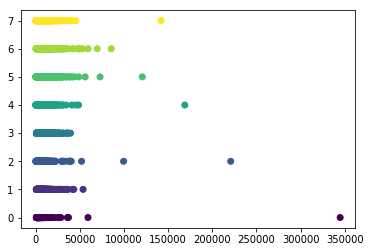

In [40]:
plt.scatter(datak["retweet_count"],datak["labels"],c=datak["labels"])

In [41]:
datak[datak["labels"] == 1]["text"]

25986    Hillary Clinton said that it is O.K. to ban Mu...
25989    When I look at all of the money the special in...
25990    Remember, I am self-funding my campaign, the o...
26003    Does anybody remember when Bill Clinton, in 20...
26008    Iran, with all of the money and all else given...
26009    The worst thing Hillary could do is have her h...
26013    I look forward to being in Lowell, Massachuset...
26044    Don’t like @SamuelLJackson’s golf swing.  Not ...
26058    RT @JoeNBC: Explosive Trump attack on HRC, Bil...
26059    The @TheView @ABC, once great when headed by @...
26060    Joy Behar, who was fired from her last show fo...
26061    I'm leaving now for Burlington, Vermont. It wi...
26063    Great time in Burlington, Vermont. Crowd was a...
26069    Not good news for Jeb Bush  https://t.co/5CrP5...
26078    South Carolina rally last night was so unbelie...
26083    (1/2) Time Magazine has me on the cover this w...
26088    I want to thank the people of Iowa for an unbe.

# DBSCAN FA CACARE

In [ ]:
ep = [x for x in np.arange(0.05, 0.12,0.002)]

#sembra ci sia l'elbow attorno a 0.11
#ep = [0.102,0.104,0.106,0.108,0.11,0.112,0.114,0.116]

#il migliore è eps =0.108 per questo 

for x in ep:
    clustering = DBSCAN(eps=x, min_samples=3,metric="cosine").fit(X)
    labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    d = silhouette_score(X, labels,metric='cosine')
    print(x,d)

#data1 = data[data["year"] == 2016]
#data1["labels"] = labels
#data1

In [ ]:
clustering = DBSCAN(eps=0.05, min_samples=3,metric="cosine").fit(X)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
d = silhouette_score(X, labels,metric='cosine')
print(d)

In [ ]:
datadb = data[data["year"] == 2016]
datadb["labels"] = labels
datadb

In [ ]:
for cluster in range(0,n_clusters_):
    c = datadb[datadb["labels"] == cluster]
    words = pd.Series(' '.join(c['modded1']).split()).value_counts()
    print("Cluster " + str(cluster), len(c))
    print(words)

# TEst

In [ ]:
nbrs = NearestNeighbors(n_neighbors=5).fit(X)
distances, indices = nbrs.kneighbors(X)
distances

In [ ]:
distances.mean()

In [ ]:
c = []
for el in distances:
    l = len(el)- 1
    c.append(el[l])
c.sort(reverse=True)
c

In [ ]:
import matplotlib.pyplot as plt

l = [x for x in range(0,len(c))]
fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(l, c)
plt.show()


In [ ]:
n = np.linspace(10,12,10)

for i in n:
    clustering = DBSCAN(eps=i, min_samples=4).fit(X)
    labels = clustering.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    d = silhouette_score(X, labels,metric='euclidean')
    print(i,d)


In [ ]:

for i in range(9,14):
    clustering = DBSCAN(eps=i, min_samples=4).fit(X)
    labels = clustering.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    d = silhouette_score(X, labels,metric='euclidean')
    print(i,d)
